<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   objid        100000 non-null  float64
 1   specobjid    100000 non-null  float64
 2   ra           100000 non-null  float64
 3   dec          100000 non-null  float64
 4   u            100000 non-null  float64
 5   g            100000 non-null  float64
 6   r            100000 non-null  float64
 7   i            100000 non-null  float64
 8   z            100000 non-null  float64
 9   run          100000 non-null  int64  
 10  rerun        100000 non-null  int64  
 11  camcol       100000 non-null  int64  
 12  field        100000 non-null  int64  
 13  plate        100000 non-null  int64  
 14  mjd          100000 non-null  int64  
 15  fiberid      100000 non-null  int64  
 16  petroRad_u   100000 non-null  float64
 17  petroRad_g   100000 non-null  float64
 18  petroRad_i   100000 non-n

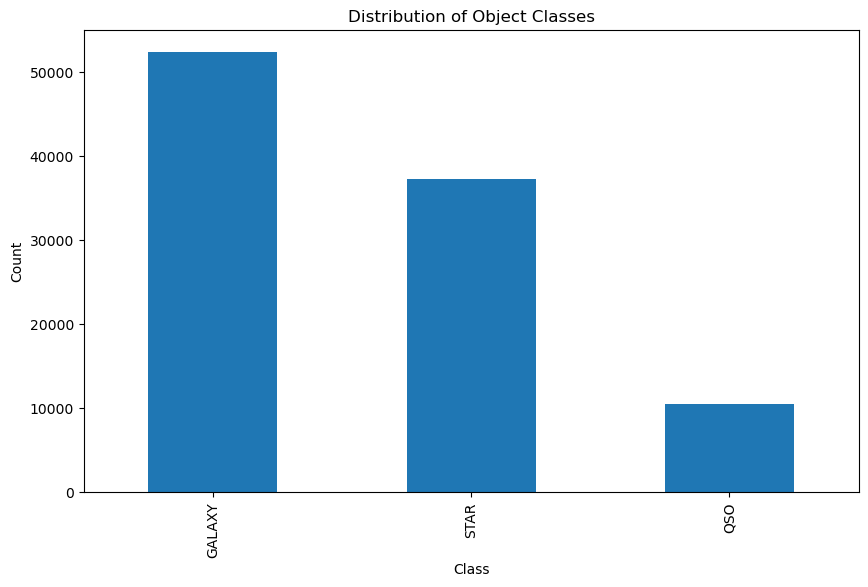

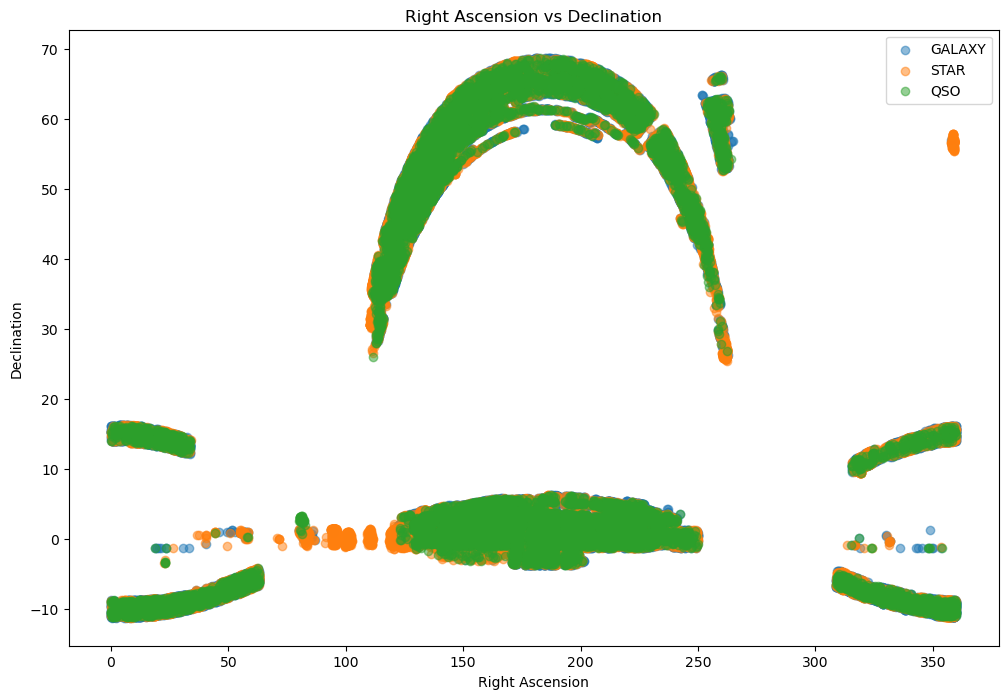

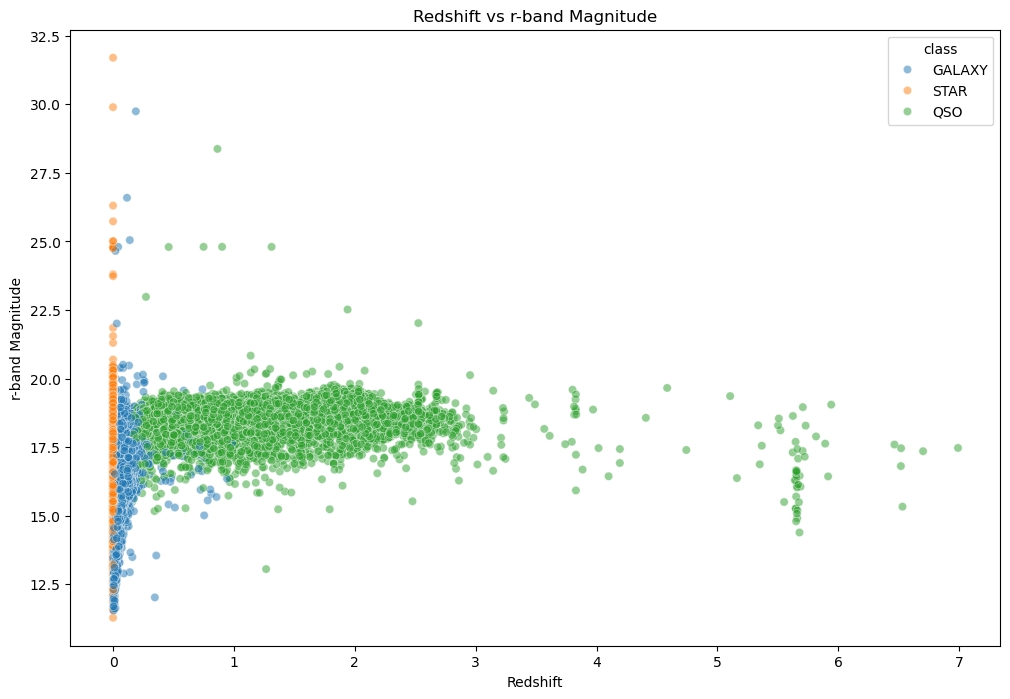

              precision    recall  f1-score   support

      GALAXY       0.99      1.00      0.99     10373
         QSO       0.99      0.95      0.97      2115
        STAR       1.00      1.00      1.00      7512

    accuracy                           0.99     20000
   macro avg       0.99      0.98      0.99     20000
weighted avg       0.99      0.99      0.99     20000

[[10334    25    14]
 [  103  2012     0]
 [    5     0  7507]]


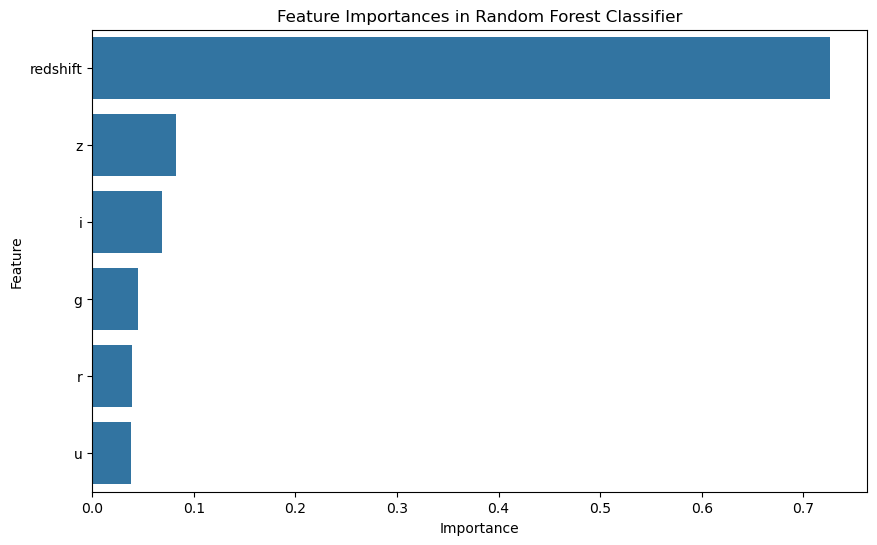

In [1]:
# SDSS Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
df = pd.read_csv('SDSS_DR18.csv')

# Display basic information about the dataset
print(df.info())
print(df.describe())

# Visualize the distribution of object classes
plt.figure(figsize=(10, 6))
df['class'].value_counts().plot(kind='bar')
plt.title('Distribution of Object Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Create a scatter plot of ra vs. dec colored by class
plt.figure(figsize=(12, 8))
for class_name in df['class'].unique():
    subset = df[df['class'] == class_name]
    plt.scatter(subset['ra'], subset['dec'], label=class_name, alpha=0.5)
plt.title('Right Ascension vs Declination')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.legend()
plt.show()

# Analyze the relationship between magnitude and redshift
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='redshift', y='r', hue='class', alpha=0.5)
plt.title('Redshift vs r-band Magnitude')
plt.xlabel('Redshift')
plt.ylabel('r-band Magnitude')
plt.show()

# Prepare data for machine learning
features = ['u', 'g', 'r', 'i', 'z', 'redshift']
X = df[features]
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Visualize feature importances
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importances in Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()